# Dump json files as graphs

In [1]:
import sys
import os
from os import sep
from os.path import dirname, realpath
from pathlib import Path
import logging
from collections import Mapping

def get_cwd(fname, subdir, crunch_dir=realpath(Path.home()) +sep +'crunch' +sep):
    """
    Convenience function to make a directory string for the current file based on inputs.
    Jupyter Notebook in Anaconda invokes the Python interpreter in Anaconda's subdirectory
    which is why changing sys.argv[0] is necessary. In the future a better way to do this
    should be preferred..
    """
    return crunch_dir +subdir +fname
    
def fix_path(cwd):
    """
    Convenience function to fix argv and python path so that jupyter notebook can run the same as
    any script in crunch.
    """
    sys.argv[0] = cwd
    module_path = os.path.abspath(os.path.join('..'))
    if module_path not in sys.path:
        sys.path.append(module_path)

fname = 'ignore_dump_json_graph.ipynb' # FILL
dir_name = 'raw'                       # FILL
fix_path(get_cwd(fname, dir_name +sep))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from graphviz import Digraph

from ipywidgets import interact, interactive, fixed
from IPython.display import display

pd.set_option("display.max_rows", 100)
pd.set_option('display.max_columns', 50)

from common_util import RAW_DIR, JSON_SFX_LEN, load_json 
from raw.common import default_joinsfile
# from recon.viz import dict_to_graph

In [2]:
joins = load_json(default_joinsfile, dir_path=RAW_DIR)
gname = default_joinsfile[:-JSON_SFX_LEN]

In [9]:
def dict_to_graph(dictionary):
	graph = Digraph() # Empty directed graph

	# BFS through the layers
	p_idx = 1
	queue = list(dictionary.items())
	while (queue):
		parent, children = queue.pop()
		graph.node(str(p_idx), label=str(p_idx))
		c_idx = p_idx + 1
		for child, grandchild in children.items():
			graph.node(str(c_idx), label=str(c_idx))
			graph.edge(head_name=str(c_idx), tail_name=str(p_idx))
			c_idx += 1
			if isinstance(grandchild, Mapping):
				queue.append((child, grandchild))
		p_idx = c_idx
	return graph

In [10]:
graph = dict_to_graph(joins)

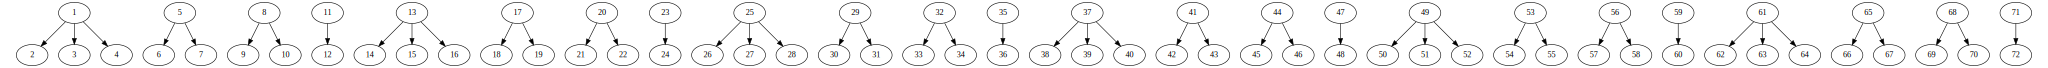

In [11]:
graph